In [ ]:
from Custom_FUNctions import *
from POST_proceso import *
from tkinter import filedialog
from pathlib import Path
import pandas as pd
from matplotlib.pyplot import plot


## Test1 

In [ ]:
v = filedialog.askopenfilename(initialdir = "/",title = "Select file",filetypes = (("csv files","*.csv"),("all files","*.*")))

In [ ]:
ejecutar(v)

#### Programa POST_Proceso "ejecutar()"


In [ ]:
[ruta,texto_1]  =   Integracion_de_archivos(v)
xf,yf,t,a       =   CalcularFFT(ruta)

[ax2,fig]       =   plotear(xf,yf,t,a)

In [ ]:
## Creación de DF
d1 ={'frec':xf,'M':yf}
d2 ={'time':t,'rel_A':a}
df1 =pd.DataFrame(data=d1)
df2 =pd.DataFrame(data=d2)



In [ ]:
p1=v.replace(".csv","_FFT_DATA.csv")
p2=v.replace(".csv","_y-t_DATA.csv")

In [ ]:
df1.to_csv(p1,index=False)
df2.to_csv(p2,index=False)

## Test 2
### Programa Comparacion

In [ ]:
### Función para superponer dos o más espectros
### Se debe seleccionar un espectro
v = filedialog.askopenfilename(initialdir = "/",title = "Select file",filetypes = (("csv files","*.csv"),("all files","*.*")))

In [ ]:
len(v)

In [ ]:
flag = True
lista_de_archivos = list()
# while len(v) != 0:
for i in range(2):
    v = filedialog.askopenfilename(initialdir = "/",title = "Select file",filetypes = (("csv files","*.csv"),("all files","*.*")))
    lista_de_archivos.append(v)

In [ ]:
for v in lista_de_archivos:
    df = pd.read_csv(v)
    aux = v.split("/")[-1].split("_")
    plot(df.values[:,0],df.values[:,1],alpha=0.5)
    #plot(df[:,0],df[:,1],alpha = 0.5)
    
xlim([30,60])
ylim([0,1])
tight_layout()
title(' '.join(aux[0:4]))
grid(visible=True, which='minor', color='k', linestyle='--',alpha = 0.25)
minorticks_on()

In [ ]:
aux = v.split("/")[-1].split("_")
' '.join(aux[0:4])
#aux

## Test 3

### Exploraciones en Wavelet y MRA

In [3]:
import pywt

In [ ]:
pywt.families(short=False)
pywt.families(short=True)


In [ ]:
pywt.wavelist(family="coif",kind='continuous')

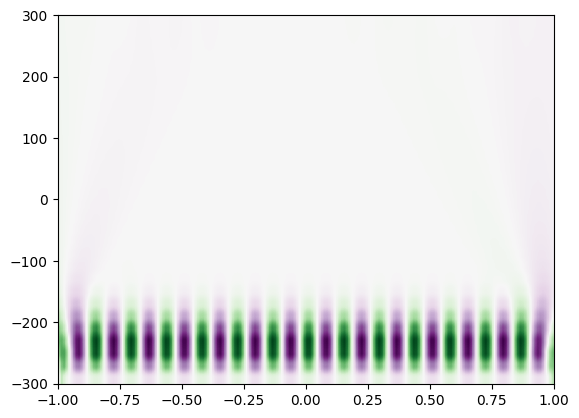

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
#sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
sig  = np.cos(2 * np.pi * 7 * t) #+ signal.gausspulse(t - 0.4, fc=2)
widths = np.arange(1, 31)
cwtmatr = signal.cwt(sig, signal.ricker, widths)


cwtmatr_yflip = np.flipud(cwtmatr)

plt.imshow(cwtmatr_yflip, extent=[-1, 1, -301, 301], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

plt.show()

In [4]:
t = np.linspace(-1, 1, 200, endpoint=False)
#sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
sig  = np.cos(2 * np.pi * 7 * t) + 0*signal.gausspulse(t - 0.4, fc=2)
wvlt = pywt.Wavelet('coif2')
wvlt = pywt.Wavelet('shan')
#plot(sig)
plot(pywt.imra(pywt.mra(sig, wvlt, level=None, axis=-1, transform='dwt', mode='periodization')))
#plot(pywt.mra(sig, wvlt, level=None, axis=-1, transform='dwt', mode='periodization'))
1+1


ValueError: The `Wavelet` class is for discrete wavelets, shan is a continuous wavelet.  Use pywt.ContinuousWavelet instead

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# currently (03/2019) scaleogram needs install via https://github.com/alsauve/scaleogram
# because an old PyWavelets (0.5.2) is installend and PyWavelets > 1.0 is needed
import scaleogram as scg 
import pywt

# choose default wavelet function for the entire notebook
scg.set_default_wavelet('cmor1-1.5')

# Try these ones to see various compromises between scales and time resolution 
#scg.set_default_wavelet('cgau5')
#scg.set_default_wavelet('cgau1')
#scg.set_default_wavelet('shan0.5-2')
#scg.set_default_wavelet('mexh')

TypeError: alpha must be numeric or None, not a string

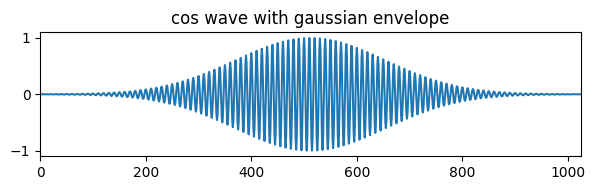

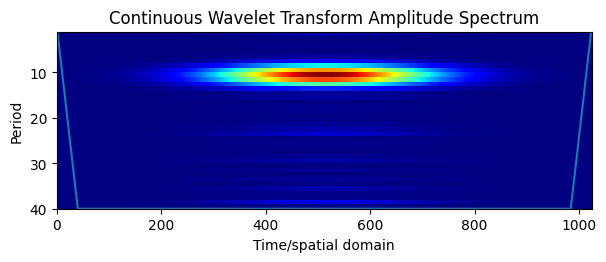

In [6]:
ns   = 1024
time = np.arange(ns)

# and a range of scales to perform the transform
scales = scg.periods2scales(np.arange(1, 40))

# and a periodic signal with varying amplitude
p1=10; periodic1 = np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/2)/200)**2)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));  
lines = ax1.plot(periodic1); 
ax1.set_xlim(0, len(time))
ax1.set_title("cos wave with gaussian envelope")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(periodic1, scales=scales, figsize=(6.9,2.3)); 
txt = ax2.annotate("p1=10s", xy=(100, 10), bbox=dict(boxstyle="round4", fc="w"))
plt.tight_layout()

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")

TypeError: alpha must be numeric or None, not a string

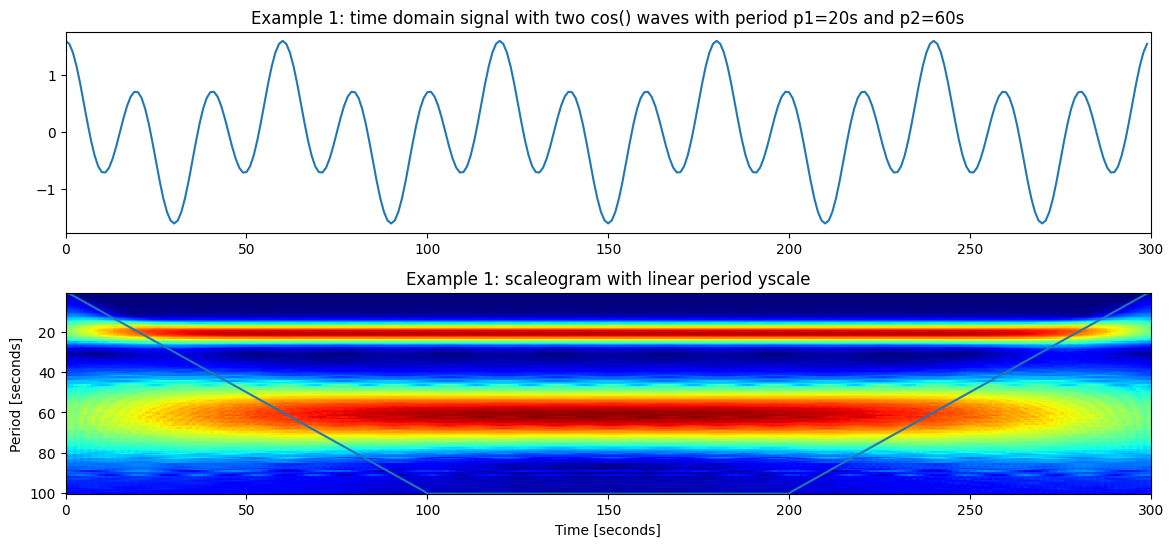

In [14]:
import numpy as np
import matplotlib.pyplot as plt
n = 300
time = np.arange(n)
p1    = 20;  f1 = 1./p1
p2    = 60; f2 = 1./p2
data = np.cos( (2*np.pi*f1) * time) + 0.6*np.cos( (2*np.pi*f2) * time)
wavelet='cmor0.7-1.5'
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6))
fig.subplots_adjust(hspace=0.3)

ax1.plot(time, data); ax1.set_xlim(0, n)
ax1.set_title('Example 1: time domain signal with two cos() waves with period p1=%ds and p2=%ds'%(p1,p2))

ax2 = scg.cws(time, data, scales=np.arange(1, 150), wavelet=wavelet,
        ax=ax2, cmap="jet", cbar=None, ylabel="Period [seconds]", xlabel="Time [seconds]",
        title='Example 1: scaleogram with linear period yscale')

txt = ax2.annotate("p1=%ds" % p1, xy=(n/2,p1), xytext=(n/2-10, p1), bbox=dict(boxstyle="round4", fc="w"))
txt = ax2.annotate("p2=%ds" % p2, xy=(n/2,p2), xytext=(n/2-10, p2), bbox=dict(boxstyle="round4", fc="w"))


<Axes: title={'center': 'Continuous Wavelet Transform Amplitude Spectrum'}, xlabel='Time/spatial domain', ylabel='Period'>

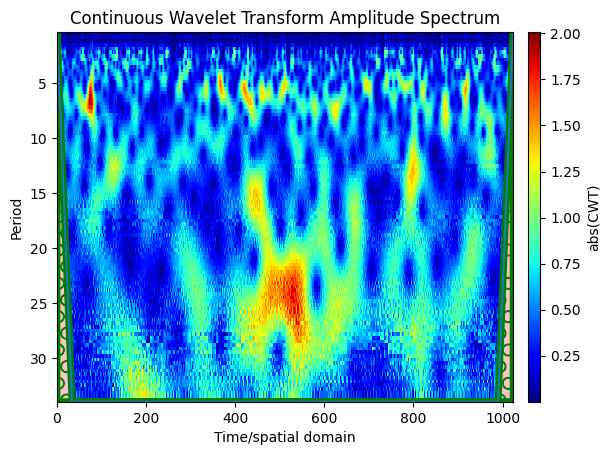

In [13]:
import scaleogram as scg
scg.cws(np.random.randn(1024), scales=np.arange(1, 100)/2., coi='O',
coikw={'alpha':1.0, 'facecolor':'pink', 'edgecolor':'green',
            'hatch':'O', 'linewidth':5})

## Test 4
### Exploraciones estadísticas

In [16]:
from Custom_FUNctions import *
from POST_proceso import *
from scipy import cluster
import numpy as np

In [3]:
 v = r"c:\Users\vidal\Desktop\_Codes\+Med\0.66\529rpm_MERGED_FFT_DATA.csv"
data = read_csv(v)


(0.0, 1.0)

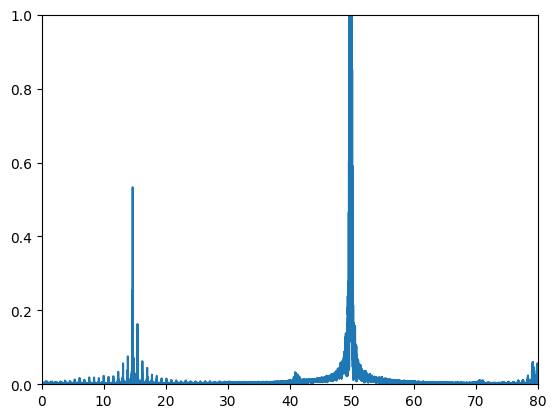

In [6]:
t   =   data.values[:,0]
y   =   data.values[:,1]
plot(t,y)
xlim([0,80])
ylim([0,1])
# data

(0.0, 0.1)

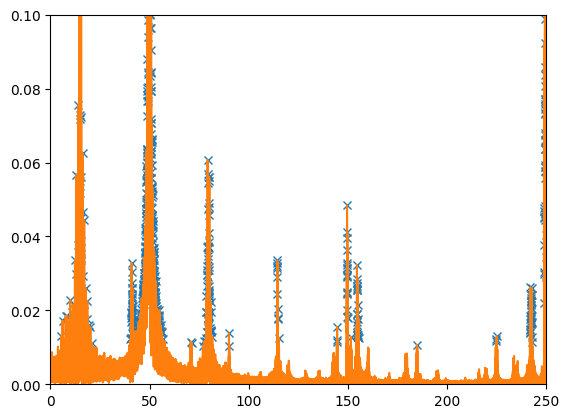

In [8]:
d=None
p=0.01
h=0.01
peaks, _ = find_peaks(y, distance=d,prominence=p,height=h)
diff(peaks)
plot(t[peaks], y[peaks], "x")
plot(t,y)
size(diff(peaks))
#diff(peaks)
xlim([0,250])

ylim([0,0.1])

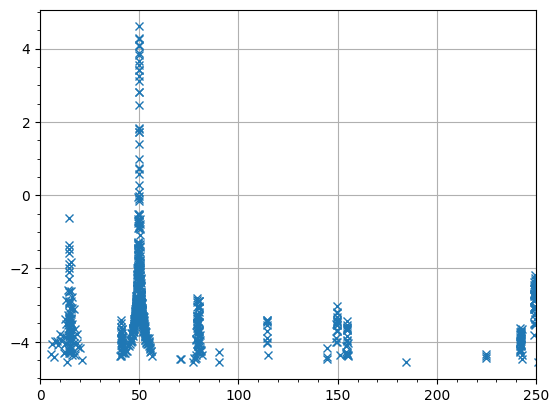

In [9]:
plot(t[peaks],log(y[peaks]),'x')
xlim([0,250])
grid()
minorticks_on()

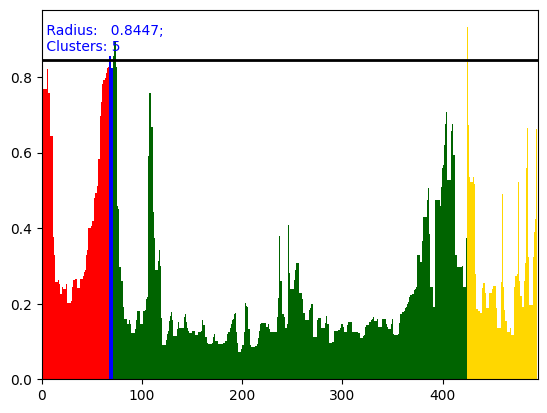

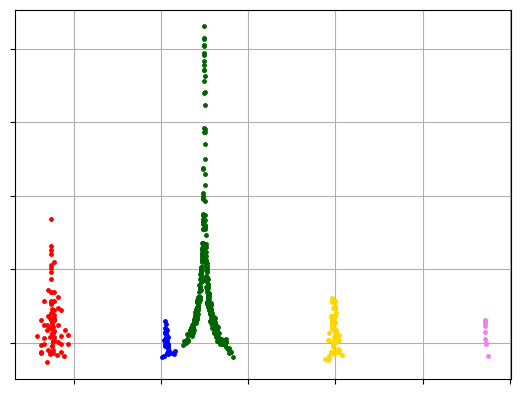

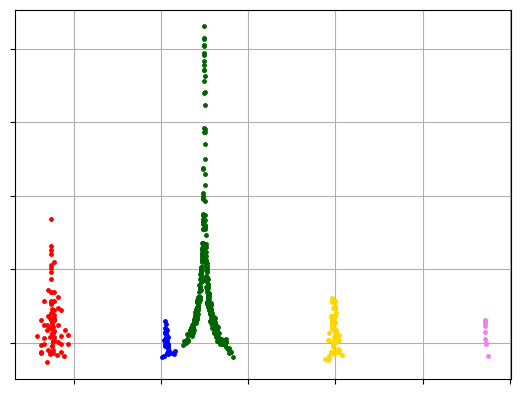

In [68]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.optics import optics, ordering_analyser, ordering_visualizer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample

# Read sample for clustering from some file
#sample = read_sample(FCPS_SAMPLES.SAMPLE_LSUN)
#sample = data.values
sample  = test1[0:len(test1)//2,:]

# Run cluster analysis where connectivity radius is bigger than real
radius = 1.0
neighbors = 5
amount_of_clusters = 5
optics_instance = optics(sample, radius, neighbors, amount_of_clusters)

# Performs cluster analysis
optics_instance.process()

# Obtain results of clustering
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()
ordering = optics_instance.get_ordering()

# Visualize ordering diagram
analyser = ordering_analyser(ordering)
ordering_visualizer.show_ordering_diagram(analyser, amount_of_clusters)

# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.show()

In [49]:
data.values
test1 = np.stack([t[peaks],log(y[peaks])],axis=-1)

In [74]:
#optics_instance.get_ordering()
a = optics_instance.get_clusters()
optics_instance.get_ordering()


[0.927234023785162,
 0.7685068848245488,
 0.7685068848245488,
 0.7685068848245488,
 0.7685068848245488,
 0.7685068848245488,
 0.8224703798285066,
 0.7570129803324639,
 0.7570129803324639,
 0.644808339516383,
 0.644808339516383,
 0.6430523566537055,
 0.37651213767744907,
 0.32989769933533547,
 0.25867494829238086,
 0.25867494829238086,
 0.25867494829238086,
 0.2631573724255319,
 0.2510272675454367,
 0.22665014085780855,
 0.22665014085780855,
 0.2451109574328258,
 0.2378246445132453,
 0.2378246445132453,
 0.2378246445132453,
 0.2510272675454367,
 0.2019488821575697,
 0.2019488821575697,
 0.2019488821575697,
 0.2019488821575697,
 0.20856862037038,
 0.24456670783940082,
 0.2619771995898698,
 0.2619771995898698,
 0.2649343522700148,
 0.2649343522700148,
 0.24102892637187714,
 0.24102892637187714,
 0.24102892637187714,
 0.26639210152537623,
 0.26639210152537623,
 0.26639210152537623,
 0.27264503758708103,
 0.28503478690204054,
 0.2884352757149293,
 0.32989769933533547,
 0.34152152740087505,
